# Problem 1: Social Network Friend Suggestion

**Breadth-First Search (BFS) and Depth-First Search (DFS)**

* Input/Output: Input an undirected social graph (users as nodes, friendships as edges) and a user U; output suggested connections at degree-2 (friends-of-friends) not already connected to U.

* Time complexity: Best O(V+E), Average O(V+E), Worst O(V+E) per traversal where V is users and E is friendships.

* Space usage: O(V) for visited sets and BFS queue or DFS stack.

* Suitability/trade-offs: BFS retrieves level-wise neighborhoods (ideal for degree-2 suggestions); DFS is helpful for structural analysis (components/cycles) but not shortest levels; both scale linearly with adjacency lists and are stable for large social graphs.

Problem 1: Social Network Friend Suggestion (BFS/DFS)

Graph adjacency list:
A: ['B', 'C']
B: ['A', 'D']
C: ['A', 'E']
D: ['B', 'E', 'F']
E: ['C', 'D', 'F']
F: ['D', 'E', 'G']
G: ['F', 'H']
H: ['G']

BFS from A: order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dist={'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3, 'G': 4, 'H': 5}
DFS from A: order=['A', 'B', 'D', 'F', 'E', 'C', 'G', 'H']
Friend suggestions for A (2nd degree): ['D', 'E']


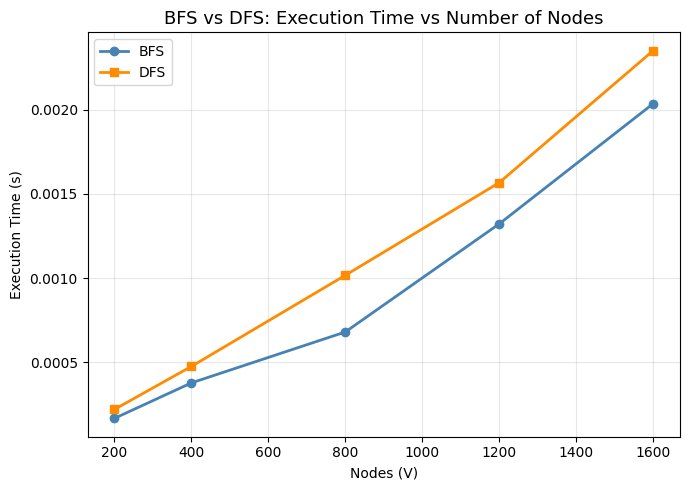

In [1]:
# Problem 1: Social Network Friend Suggestion (BFS/DFS)
import time
import random
import matplotlib.pyplot as plt
from collections import deque, defaultdict

class SocialGraph:
    def __init__(self):
        self.g = defaultdict(list)

    def add_edge(self, u, v):
        # undirected friendship
        self.g[u].append(v)
        self.g[v].append(u)

    def bfs(self, start):
        visited = set([start])
        q = deque([start])
        order = []
        dist = {start: 0}
        while q:
            u = q.popleft()
            order.append(u)
            for w in self.g[u]:
                if w not in visited:
                    visited.add(w)
                    dist[w] = dist[u] + 1
                    q.append(w)
        return order, dist

    def dfs(self, start):
        visited = set()
        stack = [start]
        order = []
        while stack:
            u = stack.pop()
            if u in visited:
                continue
            visited.add(u)
            order.append(u)
            # reverse for stable traversal order
            for w in reversed(self.g[u]):
                if w not in visited:
                    stack.append(w)
        return order

    def suggest_friends(self, user, degree=2):
        # Suggest “friends of friends” not already friends with user
        _, dist = self.bfs(user)
        direct = set(self.g[user])
        suggestions = [v for v, d in dist.items() if d == degree and v not in direct and v != user]
        return suggestions

# Demo graph
print("Problem 1: Social Network Friend Suggestion (BFS/DFS)")
print("=" * 60)
sg = SocialGraph()
edges = [
    ("A","B"), ("A","C"), ("B","D"), ("C","E"),
    ("D","F"), ("E","F"), ("F","G"), ("G","H"), ("D","E")
]
for u, v in edges:
    sg.add_edge(u, v)

print("\nGraph adjacency list:")
for u in sorted(sg.g.keys()):
    print(f"{u}: {sorted(sg.g[u])}")

start = "A"
order_bfs, dist_bfs = sg.bfs(start)
order_dfs = sg.dfs(start)
suggest = sg.suggest_friends(start, degree=2)
print(f"\nBFS from {start}: order={order_bfs}, dist={dist_bfs}")
print(f"DFS from {start}: order={order_dfs}")
print(f"Friend suggestions for {start} (2nd degree): {suggest}")

# Single visualization: BFS execution time vs number of nodes
def random_social_graph(n, avg_degree=4):
    g = SocialGraph()
    # Ensure connectivity via chain
    for i in range(n - 1):
        g.add_edge(i, i + 1)
    # Add random edges
    extra_edges = max(0, n * avg_degree // 2 - (n - 1))
    added = 0
    while added < extra_edges:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        if u != v:
            g.add_edge(u, v)
            added += 1
    return g

sizes = [200, 400, 800, 1200, 1600]
bfs_times = []
dfs_times = []
for n in sizes:
    g = random_social_graph(n, avg_degree=6)
    # Time BFS
    t0 = time.perf_counter()
    _ = g.bfs(0)
    bfs_times.append(time.perf_counter() - t0)
    # Time DFS
    t0 = time.perf_counter()
    _ = g.dfs(0)
    dfs_times.append(time.perf_counter() - t0)
plt.figure(figsize=(7, 5))
plt.plot(sizes, bfs_times, marker='o', linewidth=2, color='steelblue', label='BFS')
plt.plot(sizes, dfs_times, marker='s', linewidth=2, color='darkorange', label='DFS')
plt.title('BFS vs DFS: Execution Time vs Number of Nodes', fontsize=13)
plt.xlabel('Nodes (V)')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Problem 2: Route Finding (Bellman–Ford)

Distances from source 0: [0, 2, 4, 7, -2]
Negative cycle reachable from source? False


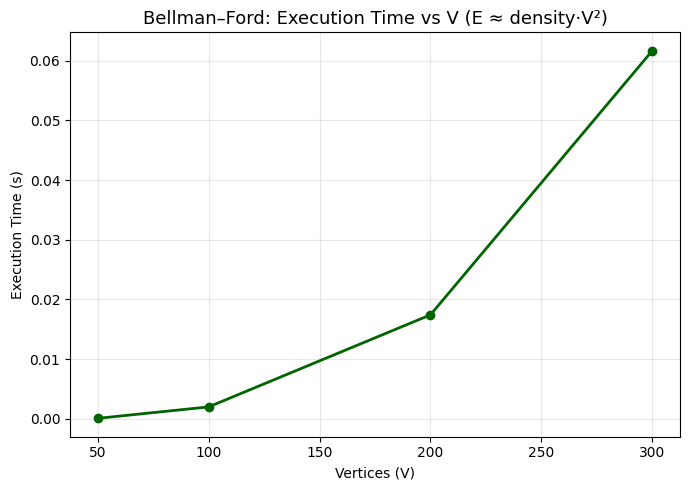

In [ ]:
# Problem 2: Route Finding (Bellman–Ford)

import time
import random
import math
import matplotlib.pyplot as plt

INF = 10**15

def bellman_ford(n, edges, src):
    """
    n: number of vertices labeled 0..n-1
    edges: list of (u, v, w)
    returns distances and a flag for negative cycle reachability from src
    """
    dist = [INF] * n
    dist[src] = 0
    # Relax edges V-1 times
    for _ in range(n - 1):
        changed = False
        for u, v, w in edges:
            if dist[u] != INF and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                changed = True
        if not changed:
            break
    # Detect negative cycle
    neg_cycle = False
    for u, v, w in edges:
        if dist[u] != INF and dist[u] + w < dist[v]:
            neg_cycle = True
            break
    return dist, neg_cycle

# Demo small graph (with a negative edge but no negative cycle)
print("Problem 2: Route Finding (Bellman–Ford)")
print("=" * 60)
n = 5
edges = [
    (0,1,6), (0,3,7),
    (1,2,5), (1,3,8), (1,4,-4),
    (2,1,-2),
    (3,2,-3), (3,4,9),
    (4,0,2), (4,2,7)
]
dist, neg = bellman_ford(n, edges, 0)
print("\nDistances from source 0:", dist)
print("Negative cycle reachable from source?", neg)

# Single visualization: time vs graph size
def random_weighted_graph(n, density=0.01, allow_negative=True):
    edges = []
    m = max(1, int(n * n * density))
    seen = set()
    while len(edges) < m:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        if u == v:
            continue
        if (u, v) in seen:
            continue
        seen.add((u, v))
        w = random.randint(-5, 20) if allow_negative else random.randint(1, 20)
        edges.append((u, v, w))
    return edges

sizes = [50, 100, 200, 300]
density = 0.02  # E ~ density * V^2
times = []
for n in sizes:
    E = random_weighted_graph(n, density=density, allow_negative=True)
    t0 = time.perf_counter()
    _ = bellman_ford(n, E, 0)
    times.append(time.perf_counter() - t0)

plt.figure(figsize=(7, 5))
plt.plot(sizes, times, marker='o', linewidth=2, color='darkgreen')
plt.title('Bellman–Ford: Execution Time vs V (E ≈ density·V²)', fontsize=13)
plt.xlabel('Vertices (V)')
plt.ylabel('Execution Time (s)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Problem 3: Emergency Response Path Planning

**Dijkstra’s Algorithm (Min-Heap Priority Queue)**

* Input/Output: Input a connected, positively weighted road network (nodes as intersections, edges as travel times) and a source; output shortest travel times from the source to all nodes.

* Time complexity: Best O(E log V), Average O(E log V), Worst O(E log V) with a binary heap on adjacency lists.

* Space usage: O(V) for distance labels and visited tracking; O(E) for storing the graph.

* Suitability/trade-offs: Optimal for non-negative weights; efficient in sparse to moderately dense networks; unsuitable with negative edges; commonly used for routing and ETA computation in real-time systems.

Problem 3: Emergency Response System (Dijkstra)

Shortest travel times from source 0 to all nodes:
0 -> 0 : 0
0 -> 1 : 7
0 -> 2 : 9
0 -> 3 : 20
0 -> 4 : 20
0 -> 5 : 11


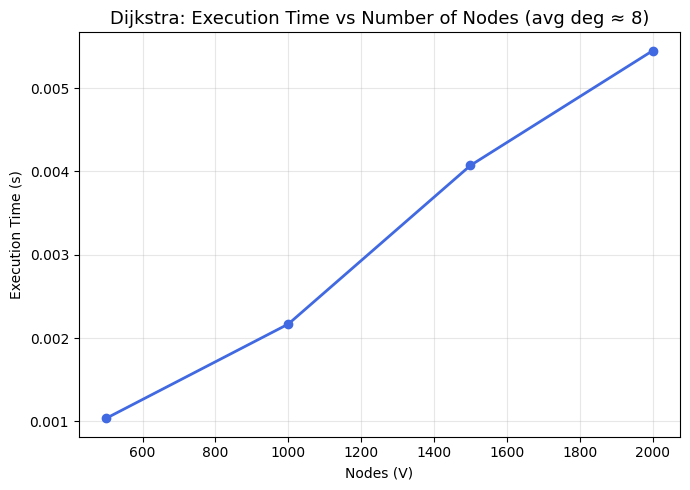

In [2]:
# Problem 3: Emergency Response System (Dijkstra with Min-Heap)

import time
import heapq
import random
import matplotlib.pyplot as plt
from collections import defaultdict

def dijkstra(n, adj, src):
    """
    n vertices 0..n-1
    adj: dict: u -> list of (v, w) with w > 0
    returns distances array
    """
    INF = 10**15
    dist = [INF] * n
    dist[src] = 0
    pq = [(0, src)]
    visited = [False] * n
    while pq:
        d, u = heapq.heappop(pq)
        if visited[u]:
            continue
        visited[u] = True
        for v, w in adj[u]:
            nd = d + w
            if nd < dist[v]:
                dist[v] = nd
                heapq.heappush(pq, (nd, v))
    return dist

# Demo city map
print("Problem 3: Emergency Response System (Dijkstra)")
print("=" * 60)
n = 6
adj = defaultdict(list)
def add_edge(u, v, w):
    adj[u].append((v, w))
    adj[v].append((u, w))

add_edge(0,1,7)
add_edge(0,2,9)
add_edge(0,5,14)
add_edge(1,2,10)
add_edge(1,3,15)
add_edge(2,3,11)
add_edge(2,5,2)
add_edge(3,4,6)
add_edge(4,5,9)

dist = dijkstra(n, adj, 0)
print("\nShortest travel times from source 0 to all nodes:")
for i, d in enumerate(dist):
    print(f"0 -> {i} : {d}")

# Single visualization: execution time vs nodes
def random_positive_graph(n, avg_degree=6):
    adj = defaultdict(list)
    # ensure connected via chain
    for i in range(n - 1):
        w = random.randint(1, 20)
        adj[i].append((i + 1, w))
        adj[i + 1].append((i, w))
    # add more edges to reach avg_degree
    edges_needed = max(0, (n * avg_degree // 2) - (n - 1))
    added = 0
    seen = set()
    while added < edges_needed:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        if u == v:
            continue
        key = (min(u, v), max(u, v))
        if key in seen:
            continue
        seen.add(key)
        w = random.randint(1, 20)
        adj[u].append((v, w))
        adj[v].append((u, w))
        added += 1
    return adj

sizes = [500, 1000, 1500, 2000]
times = []
for n in sizes:
    G = random_positive_graph(n, avg_degree=8)
    t0 = time.perf_counter()
    _ = dijkstra(n, G, 0)
    times.append(time.perf_counter() - t0)

plt.figure(figsize=(7, 5))
plt.plot(sizes, times, marker='o', linewidth=2, color='royalblue')
plt.title("Dijkstra: Execution Time vs Number of Nodes (avg deg ≈ 8)", fontsize=13)
plt.xlabel("Nodes (V)")
plt.ylabel("Execution Time (s)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Problem 4: Network Cable Installation

**Minimum Spanning Tree (Prim’s or Kruskal’s Algorithm)**

* Input/Output: Input an undirected weighted graph where nodes are sites and edges are cable costs; output the minimum spanning tree (MST) total cost and the set of MST edges.

* Time complexity: Best O(E log V), Average O(E log V), Worst O(E log V) for Prim with a heap or Kruskal with Union-Find (E log E ≈ E log V).

* Space usage: O(V+E) to store the graph; O(V) for DSU (Kruskal) or visited and key arrays (Prim).

* Suitability/trade-offs: Ensures least total cabling to connect all sites; Prim’s is efficient on dense graphs with heaps; Kruskal’s is simple and effective when sorting edges dominates; ideal for campus/metro fiber planning.

- Prim’s Algorithm: Time Complexity O((V + E) log V) due to priority queue operations; Space O(V + E). Suitable for dense graphs or when an adjacency list is available.

- Kruskal’s Algorithm: Time Complexity O(E log E) dominated by sorting edges; Space O(V + E). Better for sparse graphs or when edges are provided as a flat list.

- Applicability in Infrastructure Cost Optimization: Both compute minimum total cable cost to connect all nodes. Prim grows the tree incrementally from a seed (good for expanding networks), while Kruskal picks globally lightest edges while avoiding cycles (good when edges are pre-listed and graphs are sparse).

Problem 4: Network Cable Installation (MST: Prim and Kruskal)

Prim's MST edges (u, v, w):
(0, 2, 3)
(2, 1, 1)
(1, 3, 2)
(3, 4, 2)
(4, 5, 6)
Prim's Total MST cost: 14

Kruskal's MST edges (u, v, w):
(1, 2, 1)
(1, 3, 2)
(3, 4, 2)
(0, 2, 3)
(4, 5, 6)
Kruskal's Total MST cost: 14


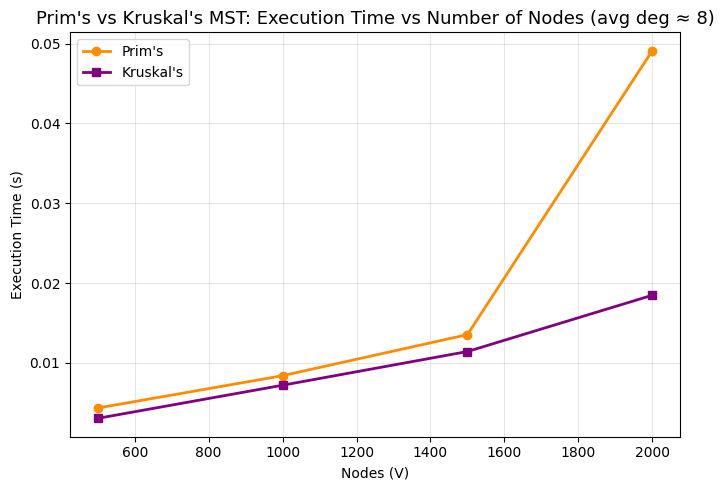

In [4]:
# Problem 4: Network Cable Installation (Minimum Spanning Tree)
# Prim's Algorithm with Min-Heap and Kruskal's Algorithm with Union-Find

import time
import heapq
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Union-Find (Disjoint Set Union) for Kruskal's
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Path compression
        return self.parent[x]

    def union(self, x, y):
        px, py = self.find(x), self.find(y)
        if px != py:
            if self.rank[px] < self.rank[py]:
                self.parent[px] = py
            elif self.rank[px] > self.rank[py]:
                self.parent[py] = px
            else:
                self.parent[py] = px
                self.rank[px] += 1
            return True
        return False

def prim_mst(n, adj):
    """
    n vertices 0..n-1
    adj: dict u -> list of (v, w) for undirected weighted graph
    returns total MST cost and list of edges (u, v, w)
    """
    visited = [False] * n
    mst_edges = []
    total = 0
    # start from node 0
    visited[0] = True
    pq = []
    for v, w in adj[0]:
        heapq.heappush(pq, (w, 0, v))
    count = 1
    while pq and count < n:
        w, u, v = heapq.heappop(pq)
        if visited[v]:
            continue
        visited[v] = True
        total += w
        mst_edges.append((u, v, w))
        count += 1
        for x, wx in adj[v]:
            if not visited[x]:
                heapq.heappush(pq, (wx, v, x))
    if count < n:
        # Graph not connected
        return None, []
    return total, mst_edges

def kruskal_mst(n, edges):
    """
    n vertices 0..n-1
    edges: list of (w, u, v) sorted by weight
    returns total MST cost and list of edges (u, v, w)
    """
    uf = UnionFind(n)
    mst_edges = []
    total = 0
    edges.sort()  # Sort by weight
    for w, u, v in edges:
        if uf.union(u, v):
            total += w
            mst_edges.append((u, v, w))
    # Check if all nodes are connected (MST should have n-1 edges)
    if len(mst_edges) == n - 1:
        return total, mst_edges
    else:
        return None, []  # Not connected

# Demo small graph
print("Problem 4: Network Cable Installation (MST: Prim and Kruskal)")
print("=" * 60)
n = 6
adj = defaultdict(list)
edges_list = []  # For Kruskal's: list of (w, u, v)
def add_edge(u, v, w):
    adj[u].append((v, w))
    adj[v].append((u, w))
    edges_list.append((w, u, v))  # For Kruskal's

add_edge(0,1,4)
add_edge(0,2,3)
add_edge(1,2,1)
add_edge(1,3,2)
add_edge(2,3,4)
add_edge(3,4,2)
add_edge(4,5,6)

# Prim's
total_prim, edges_prim = prim_mst(n, adj)
print("\nPrim's MST edges (u, v, w):")
for e in edges_prim:
    print(e)
print(f"Prim's Total MST cost: {total_prim}")

# Kruskal's
total_kruskal, edges_kruskal = kruskal_mst(n, edges_list)
print("\nKruskal's MST edges (u, v, w):")
for e in edges_kruskal:
    print(e)
print(f"Kruskal's Total MST cost: {total_kruskal}")

# Visualization: execution time vs nodes for both algorithms
def random_undirected_graph(n, avg_degree=6):
    adj = defaultdict(list)
    edges_list = []
    # ensure connectivity via chain
    for i in range(n - 1):
        w = random.randint(1, 20)
        adj[i].append((i + 1, w))
        adj[i + 1].append((i, w))
        edges_list.append((w, i, i + 1))
    edges_needed = max(0, (n * avg_degree // 2) - (n - 1))
    added = 0
    seen = set()
    while added < edges_needed:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        if u == v:
            continue
        key = (min(u, v), max(u, v))
        if key in seen:
            continue
        seen.add(key)
        w = random.randint(1, 20)
        adj[u].append((v, w))
        adj[v].append((u, w))
        edges_list.append((w, u, v))
        added += 1
    return adj, edges_list

sizes = [500, 1000, 1500, 2000]
prim_times = []
kruskal_times = []
for n in sizes:
    G_adj, G_edges = random_undirected_graph(n, avg_degree=8)
    # Time Prim's
    t0 = time.perf_counter()
    _ = prim_mst(n, G_adj)
    prim_times.append(time.perf_counter() - t0)
    # Time Kruskal's
    t0 = time.perf_counter()
    _ = kruskal_mst(n, G_edges)
    kruskal_times.append(time.perf_counter() - t0)

plt.figure(figsize=(7, 5))
plt.plot(sizes, prim_times, marker='o', linewidth=2, color='darkorange', label="Prim's")
plt.plot(sizes, kruskal_times, marker='s', linewidth=2, color='purple', label="Kruskal's")
plt.title("Prim's vs Kruskal's MST: Execution Time vs Number of Nodes (avg deg ≈ 8)", fontsize=13)
plt.xlabel("Nodes (V)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()